<font size = 6> Исследование рынка видеоигр </font>

[Ссылка на презентацию:](https://docs.google.com/presentation/d/1lE2sAORis-6AHFp2AxUqQ1hdPYVEgwHy/edit?usp=drive_link&ouid=115378190131547711286&rtpof=true&sd=true)

В нашем распоряжении данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. 

**Цель исследования** — выявить определяющие успешность игры закономерности. Для этого обработаем и исследуем имеющиеся данные, составим портрет пользователя каждого региона ((NA, EU, JP)) и проверим гипотезы:средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Откроим файл с данными и изучим общую информацию

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('/datasets/games.csv')# читаем csv-файл. данные не слились, поэтому  разделитель здесь не используем

In [3]:
data.head(20)#Выводим первые 20 строчек датафрейма data на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Нужно привести к единому регистру названия столбцов, изменить тип в дате

In [5]:
# Проверим явные дубликаты в датафрейме:
data.duplicated().sum()

0

Передо мной датафрейм в размере 16715 строк в 11 столбцах. Как видно из info() данные нужно предобработать, явно изменить названия столбцов, проверить пропуски и поменять тип в некоторых стобцах. Приступим.

### Предобработка данных

Я работник в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Передо мной собранные данные до 2016 года. Изучив общую информацию я решила составить план действий для предобработке данных.
План действий:
- Найти и изучить пропущенные значения в столбцах таблицы
- привести названия столбцов к нижнему регистру
- поменять тип в столбцах user_score, year_of_release
- удалить пустые значения в столбцах name, genre, т.к их всего лишь две записи
- проверить значения в столбцах на адекватность
- понять и заменить по возможности пропуски в столбцах Critic_Score,User_Score, Rating
- посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

In [6]:
# Найдём и изучим пропущенные значения в столбцах
data.isna().sum() 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [8]:
#столбец user_score имеет строковый тип, а не вещественный проверим почему
data['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

Некоторые значения столбца user_score имеют строковые значения tbd.'To Be Determined' - будет определено позже, можно заменить на значение не определено, для того чтобы привести столбец к вещественному типу.

In [9]:
#заменим tbd на NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [10]:
# приведем столбец с годом к целочисленному типу
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [11]:
# приведем столбец User_Score  к вещественному типу
data['user_score'] = data['user_score'].astype('float64')

In [12]:
#удалим пустые значения в столбцах name, genre
data = data.dropna(subset=['name', 'genre']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [13]:
data.describe() #проверим  на min и max значения в столбцах на адекватность

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,2006.486256,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046
std,5.875525,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [14]:
#столбец rating посмотрим какие в нем значения
data['rating'].sort_values(ascending=False).unique()

array(['T', 'RP', 'M', 'K-A', 'EC', 'E10+', 'E', 'AO', nan], dtype=object)

In [15]:
#Пропуски в рейтинге ESRB заменим на Unknown
data['rating'] = data['rating'].fillna(value='Unknown')

In [16]:
# добавление столбца общие продажи
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<div style="border:solid green 2px; padding: 20px">
<b>Вывод</b>
    
В ходе предобработке были обнаружены пропуски в столбцах:year_of_release -269, critic_score-8578, user_score-6701, rating-6766. Проопуски в столбце года релиза, не смотря на их небольшое количество, удалять их пока не будем, прибережем. Также в этом столбце год указан с плавающей точкой, следовательно его перевели в целочисленное значение.

Некоторые значения столбца user_score имеют строковые значения tbd.'To Be Determined' - будет определено позже, очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату. Естественно, оно может применяться и в других случаях, но данный вариант является самым распространенным. Также вы можете увидеть TBD и в отношении уже вышедших в свет игр, если у них готовится к релизу какое-либо дополнение, однако пока не известно, когда именно оно будет выпущено.
Поэтому в данной ситуации заменить на значение не определено, для того чтобы привести столбец к вещественному типу.


В данной датафрейм сущетсвуют пропуски в столбцах оценки от критиков и пользователей. Это сущетсвенная проблема, попытаемся разобратся с ней. Предположим, что оценка может отсутсвовать по причине незначительности игры, проверим такой вариант. Возьмем первую же игру у которой стоят пропуски в этих столбцах:Pokemon Red/Pokemon Blue и проверим информацию о ней в интернете. Игры получили хорошие оценки у критиков; они хвалили их возможность многопользовательской игры, особенно концепцию обмена покемонами. Red и Blue получили 89 % от GameRankings и удерживали постоянное место в рейтинге «Топ 100 лучших игр всех времён» по версии IGN. Релиз игры положил начало многомиллионному франчайзу «Покемон» и продаже миллионов копий игры по всему миру, поэтому в 2009 году игра попала в Книгу рекордов Гиннесса в разделе «Самая продаваемая RPG на Game Boy» и «Самая продаваемая RPG всех времён»

Значит наше предположение не верно, считать среднее или медиану не подойдет. Следовательно в данном случае целесообразно просто не трогать эти пропуски, т.к корректной замены они не имеют.

При проверке датафрейма методом describe() явных аномалий не было обнаруженно. 

В наборе данных столбца rating попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.

- EC	Для детей младшего возраста. 
- E	Подходит для всех возрастных категорий. 
- E 10+	Подходит для лиц старше 10 лет. 
- T	Подходит для лиц старше 13 лет. 
- M	Подходит для лиц старше 17 лет. 
- AO Подходит для взрослых старше 18 лет. 
- RP Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

Ни один из крупных производителей консолей не разрешает игры AO на своих системах, и лишь немногие розничные продавцы продают игры AO в своих магазинах. Рейтинг «K-A» («Kids to Adults»)— «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше. Такие игры подходят для всех возрастов. Такой рейтинг сущетсвовал до 1998 года.
 
Значит пропуски заменим на 'Unknown'  так как это важная информация.


### Исследовательский анализ данных

**План работ**

- Узнать колличество игр выпущенных в разные годы. Важны ли данные за все периоды?
- Узнать, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами;
- Построить распределение по годам; - Найти популярные в прошлом платформы, у которых сейчас продажи на нуле; - За какой характерный период появляются новые и исчезают старые платформы.
- Определить, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.


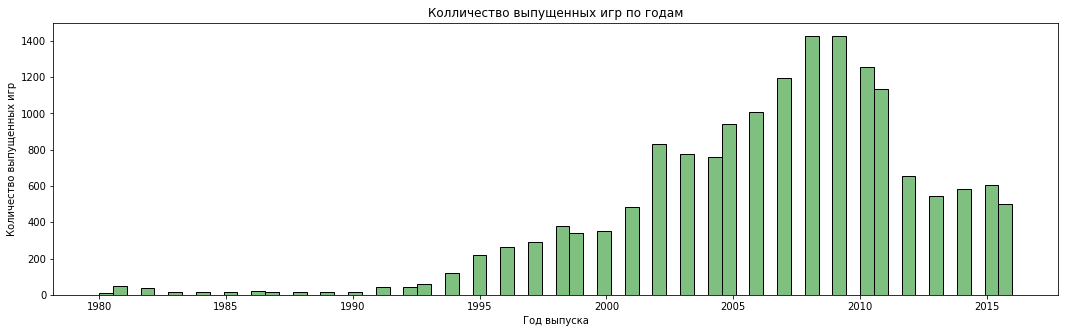

In [17]:
# построим график выпущенных игр по годам
plt.figure(figsize=(18, 5))
sns.histplot(data['year_of_release'],  color = 'green',alpha = 0.5)
plt.title("Колличество выпущенных игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()

Из графика выпущенных игр по годам, можно просмотреть историю зарождения игровой индустрии, пик популярности пришелся на 2008-2009 год и потом резкий спад с 2012 года. При том, что в 2008 произршел финансовый кризис, несмотря на мировой масштаб, для игровой индустрии был событием далеко не таким разрушительным. 


In [18]:
# выделим топ платформ по продажам
top_pla_sale=data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

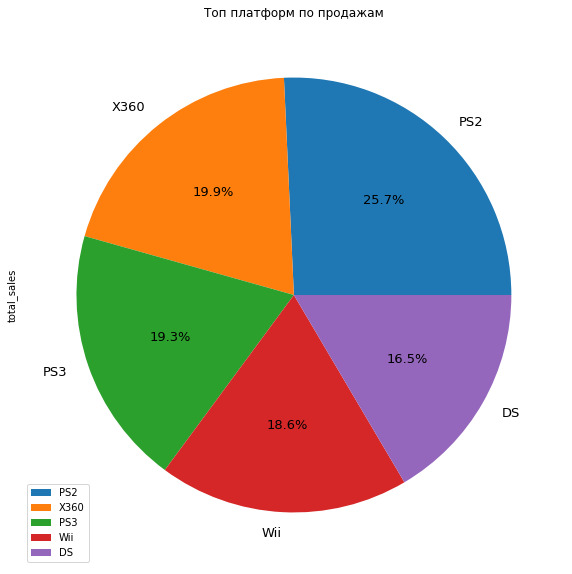

In [19]:
top_pla_sale.head(5)\
    .plot(kind='pie', subplots=True,autopct='%1.1f%%', fontsize=13 ,figsize=(10,10))
plt.title("Топ платформ по продажам")
plt.show()

In [20]:
# сделаем сводную платформ по продажам и соединим его со списком топов, чтобы в дальнейшем сделать график
top=data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
platforms_top = top.query('platform in @platform_list').reset_index()
platforms_top

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96


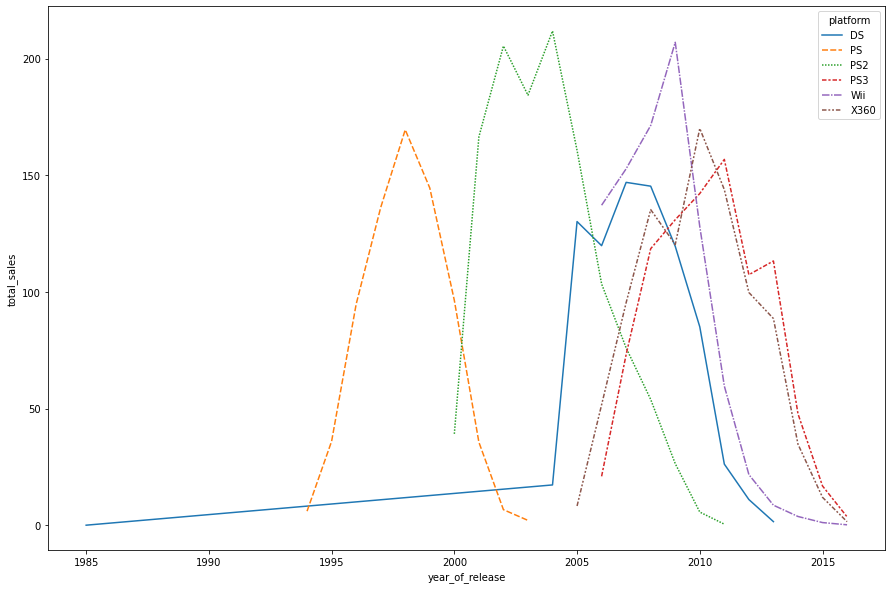

In [21]:
# посторим распределение продаж платформ по годам
plt.figure(figsize=(15,10))
sns.lineplot(data=platforms_top, x="year_of_release", y="total_sales", hue="platform", style="platform")
plt.show()

In [22]:
# узнаем среднюю продолжительность жизни платформ
life_of_platform = data.pivot_table(index='platform',columns = 'year_of_release',values='total_sales',aggfunc='sum')
life_of_platform.count(axis = 1).mean()

7.67741935483871

Из графика выпущенных игр по годам, наблюдается спад игровой индустрии с 2012 года, далее, она идет практически вровень. Скорее всего это связано с возрастающей популярностью мобильных игр.  Дальше смотрим топ платформ по продажам, их получается 6:'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Теперь нужно посмотреть как у них обстоят дела с продажами именно по годам, иначе получится, что у платформы был грандиозный успех в 2000, а теперь ее уже нет, что как раз таки подтверждает наш график. Поэтому в дальнейшем важно смотреть продажи в отобранный нами ранее период.


В среднем продолжительность платформы состовляет 7.6 лет. Хотя история приставок началась еще в 1972 году вместе с релизом первой в мире домашней игровой приставки Magnavox Odyssey, прорыв в этом направлении начинается в 1977 году, когда в продажу поступает игровая приставка Atari 2600. Благодаря инвестициям Atari популяризация компьютерных и видеоигр выходит на новый уровень. Появляются новые крупные игроки, желающие занять теплое место на рынке видеоигр. В качестве крупнейших кроме Atari в историю вошли Sega, Nintendo, Sony и Microsoft.Некоторые из них «взрывают» рынок и вытесняют старые, некоторые не обретают взрывного роста но занимают свою нишу — к примеру Smart TV, умные часы, игры в самолетах, игры на вейпах и др.Таким образом, нас точно не интересуют платформы, продаж и релизов для которых не было в последний год, возвращений после полного упадка практически не случается. Кроме того, платформы старше 10 лет доживают свой век, и скорее всего в следующем году продажи для них будут крайне низкими - стоит смотреть в сторону тех, что вышли не более 5 лет назад и не перевалили за экватор средне-консольной продолжительности жизни.

Значит для актуального анализа возмем период с 2013 по 2016 г. Эти данные помогут построить прогноз на 2017 год.  

**Исследуем данные за период 2013 - 2016 год**
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. - Велика ли разница в продажах? - В средних продажах на разных платформах?
- Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Построить диаграмму рассеяния; - Посчитать корреляцию между отзывами и продажами; - Сформулировать выводы и соотнесите их с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. - Сделать выводы о самых прибыльных жанрах; - Выделяются ли жанры с высокими и низкими продажами?

In [23]:
# делаем срез с нужного нам года, сводим в единую таблицу 
data_actual = data.query("year_of_release >= 2013")
platform_lid=data_actual.pivot_table(index='platform', columns = 'year_of_release',values='total_sales', aggfunc='sum')
platform_lid

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


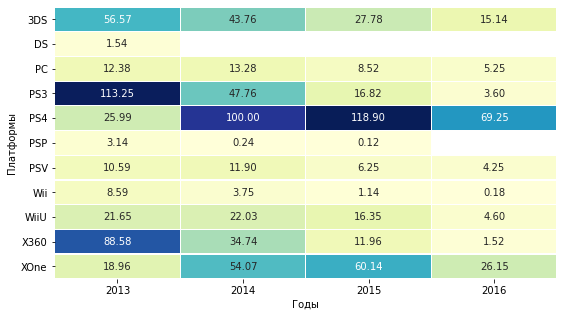

In [24]:
# посторим хитмеп для наглядности
plt.figure(figsize=(9, 5))
sns.heatmap(platform_lid, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

In [25]:
# для дальнейшего удобства делаем срез и по отобранным платформам и нужный нам период
data_actual_2 = data.query('platform in ["PS4","PS3","WiiU", "XOne", "PC", "3DS","X360"] and year_of_release >= 2013')

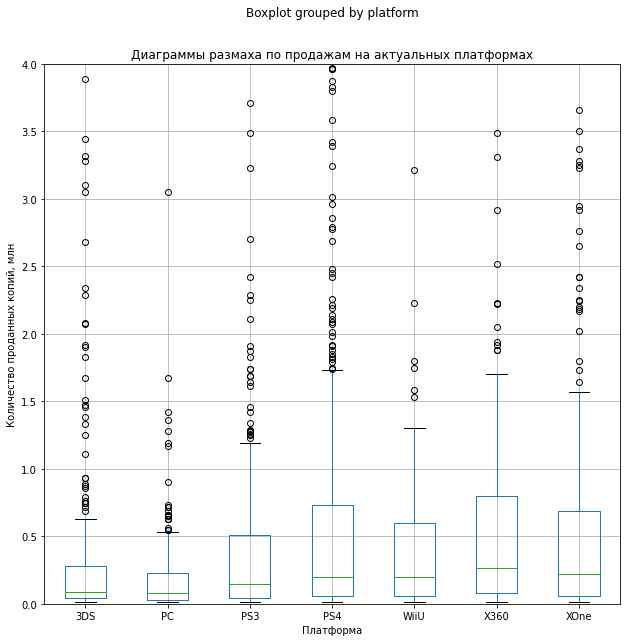

In [26]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
data_actual_2.boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 4)
plt.show()

Лидером продаж является PlayStation 4, но и размах продаж по годам у нее самый большой - во второй год с момента выпуска ее популярность выросла почти в 2 раза. ПК является самой непопулярной платформой, но и самой стабильной - размах самый узкий. Среднее число продаж игр для десктопов самое низкое и доля бестселлеров самая маленькая.Yо выбросы показывают, что у каждой из платформ случаются супер-хиты, приносящие миллионы

In [27]:
# осчитайте корреляцию между отзывами и продажами​ внутри одной популярной платформы
data_select = data.query('platform == "PS4"and year_of_release >= 2013')
corr=data_select[['total_sales','critic_score','user_score']].corr()
display(corr.style.background_gradient(cmap='coolwarm'))

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


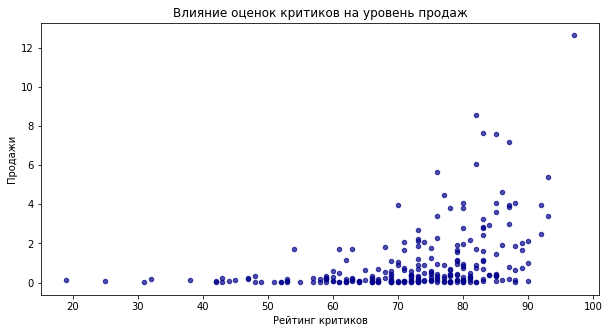

In [28]:
 # построим график рассеяния 
data_select.plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.7, color='DarkBlue', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()

In [29]:
# посмотрим корреляцию для других ранее отобранных популярных платформ
for p in ["WiiU", "3DS", "PC", "PS3", "X360", "XOne"]:
    print(p)
    data_selec = data.query('platform == @p')
    print(f'Корреляция между оценкой критиков и продажами: {data_selec.critic_score.corr(data_selec.total_sales):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {data_selec.user_score.corr(data_selec.total_sales):.2}')
    print('--' * 35)

WiiU
Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: 0.4
----------------------------------------------------------------------
3DS
Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: 0.22
----------------------------------------------------------------------
PC
Корреляция между оценкой критиков и продажами: 0.26
Корреляция между оценкой пользователей и продажами: 0.01
----------------------------------------------------------------------
PS3
Корреляция между оценкой критиков и продажами: 0.43
Корреляция между оценкой пользователей и продажами: 0.13
----------------------------------------------------------------------
X360
Корреляция между оценкой критиков и продажами: 0.39
Корреляция между оценкой пользователей и продажами: 0.11
----------------------------------------------------------------------
XOne
Корреляция между оценкой критиков и продажами: 0.42
Корреляция между оценко

In [30]:
# осчитайте корреляцию между отзывами и продажами​ внутри одной популярной платформы
data_select = data.query('platform == "PS4"and year_of_release >= 2013')
corr=data_select[['total_sales','critic_score','user_score']].corr()
display(corr.style.background_gradient(cmap='coolwarm'))

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


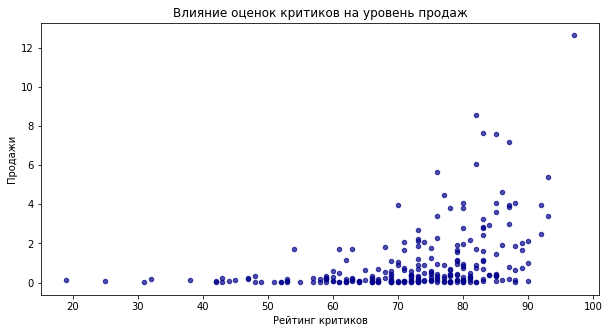

In [31]:
 # построим график рассеяния 
data_select.plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.7, color='DarkBlue', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()

In [32]:
# посмотрим корреляцию для других ранее отобранных популярных платформ
for p in ["WiiU", "3DS", "PC", "PS3", "X360", "XOne"]:
    print(p)
    data_selec = data.query('platform == @p and year_of_release >= 2013')
    print(f'Корреляция между оценкой критиков и продажами: {data_selec.critic_score.corr(data_selec.total_sales):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {data_selec.user_score.corr(data_selec.total_sales):.2}')
    print('--' * 35)

WiiU
Корреляция между оценкой критиков и продажами: 0.38
Корреляция между оценкой пользователей и продажами: 0.42
----------------------------------------------------------------------
3DS
Корреляция между оценкой критиков и продажами: 0.36
Корреляция между оценкой пользователей и продажами: 0.24
----------------------------------------------------------------------
PC
Корреляция между оценкой критиков и продажами: 0.2
Корреляция между оценкой пользователей и продажами: -0.094
----------------------------------------------------------------------
PS3
Корреляция между оценкой критиков и продажами: 0.33
Корреляция между оценкой пользователей и продажами: 0.0024
----------------------------------------------------------------------
X360
Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: -0.012
----------------------------------------------------------------------
XOne
Корреляция между оценкой критиков и продажами: 0.42
Корреляция между 

Значения корреляций отличаются, но общий тренд есть. Оценка критиков немного сильнее коррелирует с продажами, хотя эта связь и не является сильной. Корреляция оценок пользователей и продаж совсем слабая. Возможно, это связано и с тем, что далеко не все пользователи пишут отзывы и оставляют оценки.

In [33]:
# выделим топ жанров по продажам
data_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


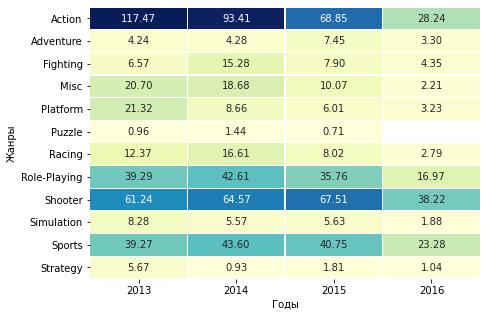

In [34]:
#посторим хитмеп для наглядности
ter=data_actual_2.pivot_table(index='genre',columns = 'year_of_release', values='total_sales', aggfunc='sum')
plt.figure(figsize=(7, 5))
sns.heatmap(ter, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Годы')
plt.ylabel('Жанры')
plt.show()

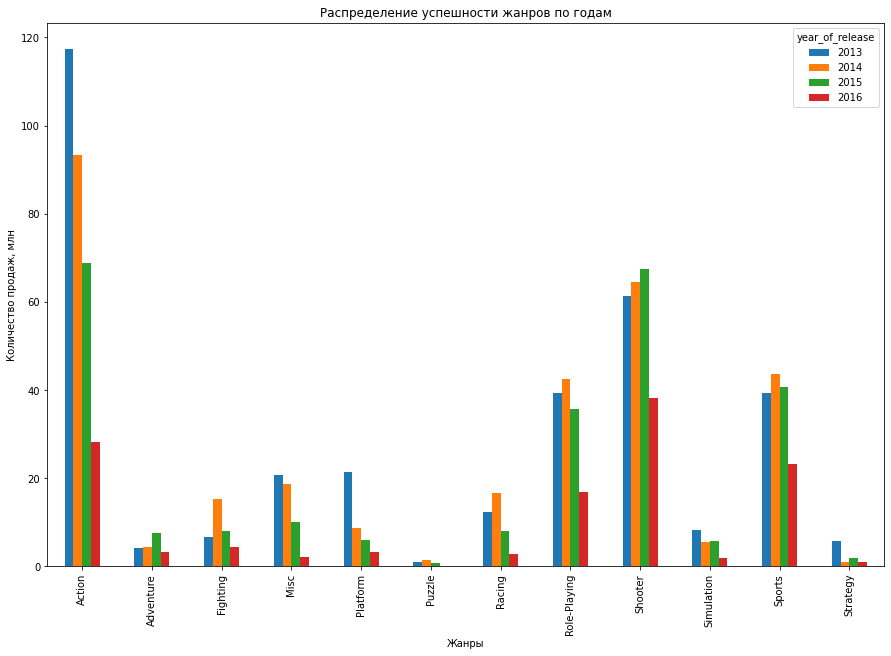

In [35]:
#сделаем график распределение успешности жанров по годам
ter.plot(kind='bar',figsize=(15, 10))
plt.title('Распределение успешности жанров по годам')
plt.xlabel('Жанры')
plt.ylabel('Количеcтво продаж, млн')
plt.show()

In [36]:
srep=data_actual_2.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False)
srep

,total_sales
genre,
Shooter,0.440
Sports,0.345
Platform,0.250
Role-Playing,0.170
Fighting,0.150
Action,0.130
Misc,0.130
Racing,0.125
Simulation,0.100


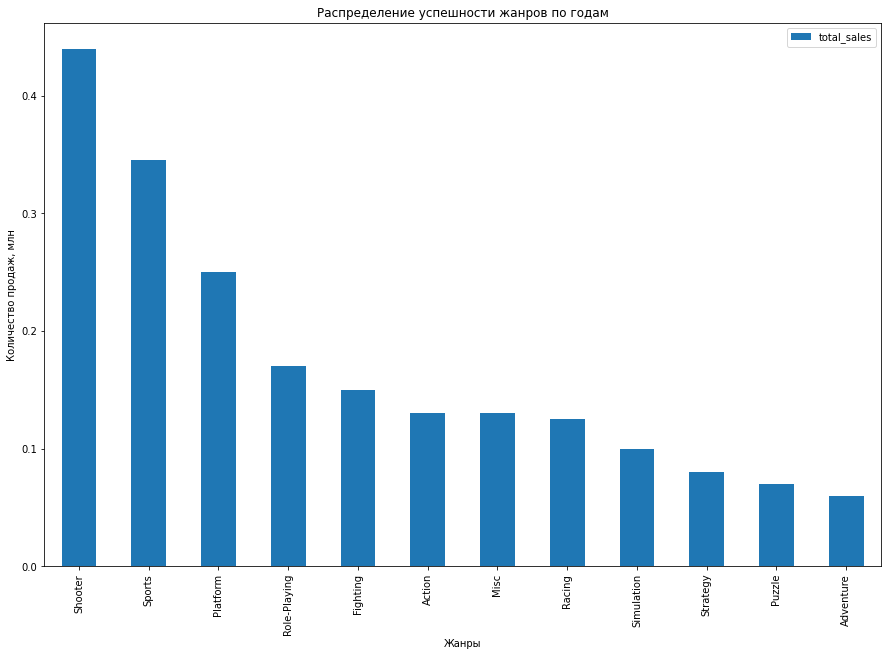

In [37]:
#сделаем график распределение успешности жанров по годам
srep.plot(kind='bar',figsize=(15, 10))
plt.title('Распределение успешности жанров по годам')
plt.xlabel('Жанры')
plt.ylabel('Количеcтво продаж, млн')
plt.show()

<div style="border:solid green 2px; padding: 20px">
<b>Вывод</b>
    
Из всех этих данных в видно, что PlayStation 4, WiiU, XBox One находятся на подъеме, т.к это последние вышедшие на тот год свежие консоли. Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, это связано с тем, что по истечении данного срока выпускается обновленная версия платформы. Яркий тому пример - консоли Playstation и Xbox.  
Wii и PSP отжили свое, а персональные компьютеры стабильно держатся на плаву. Для дальнейшего анализа оставим наиболее перспективные платформы - PlayStation 4, WiiU, XBox One и PC, а также еще не лишенную потенциала Nintendo 3DS. и будем опираться на данные с 2013 года, как наиболее актуальные (год, когда все платформы, принятые нами как актуальные, уже вышли).

При построение ящика с усами, заметили, что медианное значение для платформ Playstation 4, Xbox One и Nintendo WIiU приблизительно равны. Это неудивительно, ведь разработчики стараются выпускать свои игры для каждой платформы. Однако для этих платформ иногда выпускаются эксклюзивные игры. Выбросы же говорят об очень популярных играх, которые хорошо продаются. Сравним 3DS и XOne. У первого маленький ящик и много выбросов. Это говорит о том, что большАя часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают самые разные игры, причем, в немалом количестве.

Анализ корреляции показал, что для каждой из перечисленных платформ, корреляция между продажами и оценками как пользователей, так и критиков очень мала, причем  между продажами и оценками пользователей корреляция не только слабая, но и обратная.Тем не менее, можно сказать, что оценка критиков является более весомым аргументом для покупки, чем оценка пользователей. Возможно это связано с тем, что основной поток продаж предшествует оценкам, т.к интерес к продукции подогревается с помощью рекламных акции и анонсов.

О связи оценок и продаж трудно говорить и потому, что некоторые игры поставляются эксклюзивно только на одной платформе, например. Или, как в случае Call od Duty, игра является частью большой старой серии, которую люди ждут и покупают из-за имени, репутации.

Если рассматривать ситуацию с жанрами, то большей популярностью обладают Shooter, Sports, Platform, Role-Playing, скорей всего это связано с тем, что действие таких игр развивается очень динамично и требует напряжения внимания и быстрой реакции на происходящие в игре события. Наименьшей популяронстью обладают Puzzle и Adventure, скорей всего из=за своей не динамичностью.


### Составление портрета пользователя каждого региона

In [38]:
#отображает две таблицы рядом
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [39]:
#создадим функцию для определения пользователя каждого региона (NA, EU, JP)
def re(index):
    top_plat=data.query('year_of_release >= 2013')\
    .pivot_table(index='platform', values=index, aggfunc='sum')\
    .sort_values(by=index, ascending=False)
    display(top_plat)

    top_gen=data.query('year_of_release >= 2013')\
    .pivot_table(index='genre', values=index, aggfunc='median')\
    .sort_values(by=index, ascending=False)
    display(top_gen)
    
re('na_sales')

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


,na_sales
genre,
Shooter,0.200
Platform,0.090
Sports,0.080
Fighting,0.045
Racing,0.030
Action,0.020
Role-Playing,0.020
Misc,0.010
Adventure,0.000


In [40]:
re('eu_sales')

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


,eu_sales
genre,
Shooter,0.190
Platform,0.080
Racing,0.060
Sports,0.050
Simulation,0.035
Strategy,0.025
Action,0.020
Fighting,0.020
Misc,0.010


In [41]:
re('jp_sales')

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Misc,0.02
Puzzle,0.02
Action,0.01
Adventure,0.01
Platform,0.00
Racing,0.00
Shooter,0.00


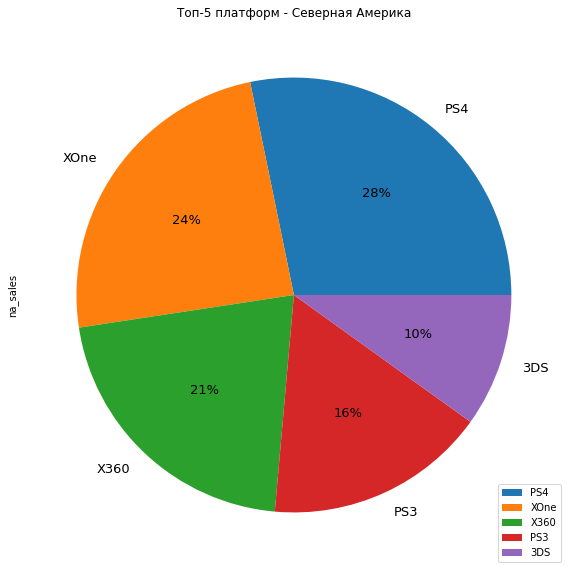

In [42]:
#создадим функцию для наглядности в долевом соотношение
def pi(index):
    top_pla=data.query('year_of_release >= 2013')\
    .pivot_table(index='platform', values=index, aggfunc='sum')\
    .sort_values(by=index, ascending=False)\
    .head(5)\
    .plot(kind='pie', subplots=True,autopct='%.0f%%', fontsize=13 ,figsize=(10,10))

pi('na_sales')
plt.title("Топ-5 платформ - Северная Америка")
plt.show()

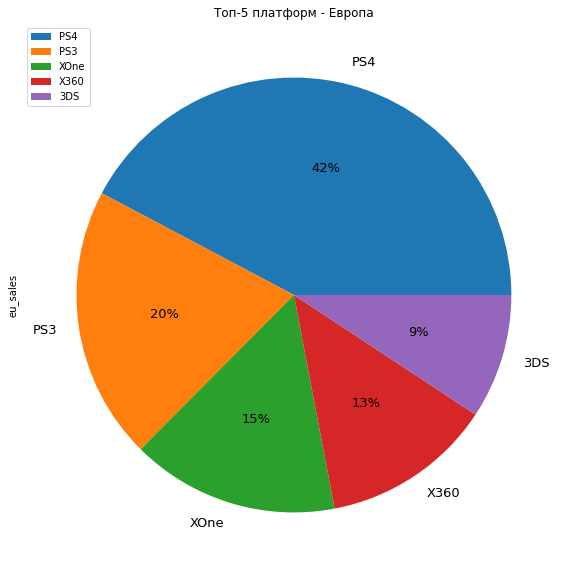

In [43]:
pi('eu_sales')
plt.title("Топ-5 платформ - Европа")
plt.show()

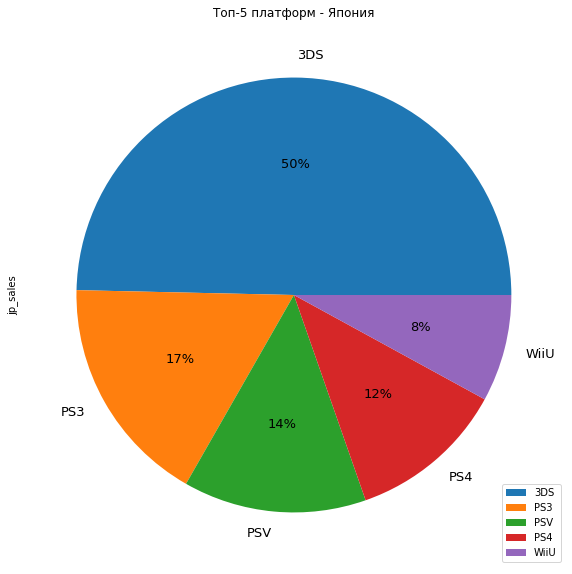

In [44]:
pi('jp_sales')
plt.title("Топ-5 платформ - Япония")
plt.show()

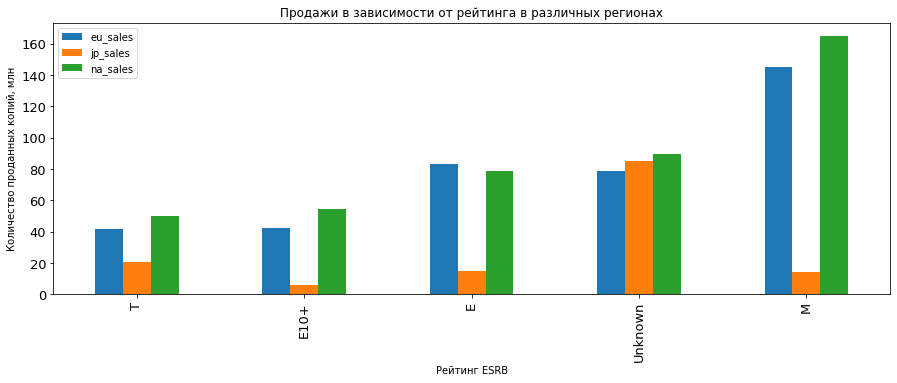

In [45]:
#Продажи в зависимости от рейтинга в различных регионах
data_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
    .sort_values(by='na_sales')\
    .plot(kind='bar',fontsize=13, figsize=(15, 5))

plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

<div style="border:solid green 2px; padding: 20px">
<b>Вывод</b>
    
В Европе и Северной Америке топ-5 плаформ состоит из одинаковых консолей, хотя и в разном порядке - XBox 360, XOne, 3DS, PlayStation 3 и PlayStation 4. И там, и там относительно свежая PlayStation4 уже набрала популярность. В Японии Xbox 360 даже не вошла в топ, лидер - мобильная консоль Nintendo, дело в патриотических предпочтениях - Nintendo и Sony японские корпорации.

Европейский и североамериканский регион же во многом схожи друг с другом. Их ТОП жанров почти идентичен - Action, Shooter, Sports,Role-Playing. Разница лишь в том, что в Америке интерес вызывает разнообразный жанр-Misc, а в Европе- Racing.
На удивлиение Япония не так далеко ушла в игровых предпочтения: Role-Playing, Action, Misc, Fighting и Shooter.
Единогласное мнение во всех изучаемых регионах, заключается в том, что жанр Puzzle максимально не популярен.

ЕSRB была образована американской ассоциацией производителей компьютерных игр и ПО в 1994 году, чему предшествовали активные судебные дебаты с участием сенатора Джо Либермана, знаменитого борца с виртуальным насилием. Интересно, что для многопользовательских сетевых игр, где содержимое может модифицироваться пользователями, есть собственное уникальное предупреждение, что «игровой опыт может меняться в процессе игры онлайн».Однако если немного изучить результаты деятельности той же ESRB, то можно приметить подозрительно малое количество игр с рейтингом Adults Only, который подразумевает ограничение по возрасту 18+. За всю историю существования американской рейтинговой комиссии «AO» за насилие получили лишь две игры — старенький файтинг Thrill Kill и откровенно человеконенавистнический инди top-down шутер Hatred. Все прочие игры для взрослых ESRB оценивали на другой рейтинг для взрослых — Mature 17+. Топ самых продаваемых категорий в Америке и Европе совпадает. Больше всего продаются игры с рейтингом "для взрослых (старше 16 лет)". Следом идут игры для всех - игры, которые имеют самую широкую аудиторию, могут быть интересны как детям, так и взрослым, затем игры для школьников и подростков. А в Японии наоборот, игры для взрослых имеют меньшую популярность, скорей всего их просто не пропускает цензура. 

### Проверка гипотез

*1 Гипотеза о средних пользовательских рейтингах платформ Xbox One и PC*
- H0 - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1 - cредние пользовательские рейтинги платформ Xbox One и PC разные

Классический подход к проверке статистической значимости требует, чтобы мы устанавливали уровень значимости до того, как обратимся к нашим данным. Часто выбирается уровень в 5%, и поэтому мы на нем и остановимся.
критический уровень поставим  alpha = 0.05

In [46]:
from scipy import stats as st
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    data_actual[(data_actual.platform == "XOne") & (data_actual.user_score.notna())]['user_score'], 
    data_actual[(data_actual.platform == "PC") & (data_actual.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


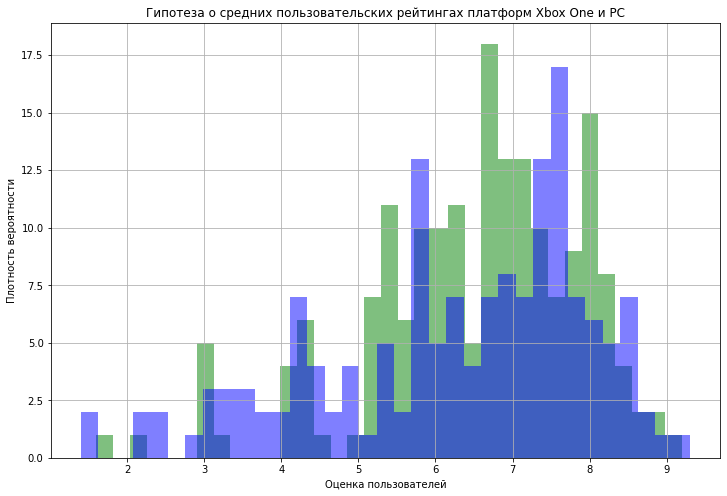

In [47]:
#посмотрим результат на графике
data_actual[(data_actual.platform == "XOne") & (data_actual.user_score.notna())]['user_score'].hist(bins=35, alpha=0.5, figsize=(12, 8), color='green')
data_actual[(data_actual.platform == "PC") & (data_actual.user_score.notna())]['user_score'].hist(bins=35, alpha=0.5, figsize=(12, 8), color='blue');
plt.xlabel('Оценка пользователей')
plt.ylabel('Плотность вероятности')
plt.title('Гипотеза о средних пользовательских рейтингах платформ Xbox One и PC')
plt.show()

*2 Гипотеза о средних пользовательских рейтингах жанров Action и Sports*
- H0 - cредние пользовательские рейтинги жанров Action и Sports одинаковые
- H1 - cредние пользовательские рейтинги жанров Action и Sports разные

Классический подход к проверке статистической значимости требует, чтобы мы устанавливали уровень значимости до того, как обратимся к нашим данным. Часто выбирается уровень в 5%, и поэтому мы на нем и остановимся.
критический уровень поставим  alpha = 0.05

In [48]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    data_actual[(data_actual.genre == "Action") & (data_actual.user_score.notna())]['user_score'], 
    data_actual[(data_actual.genre == "Sports") & (data_actual.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


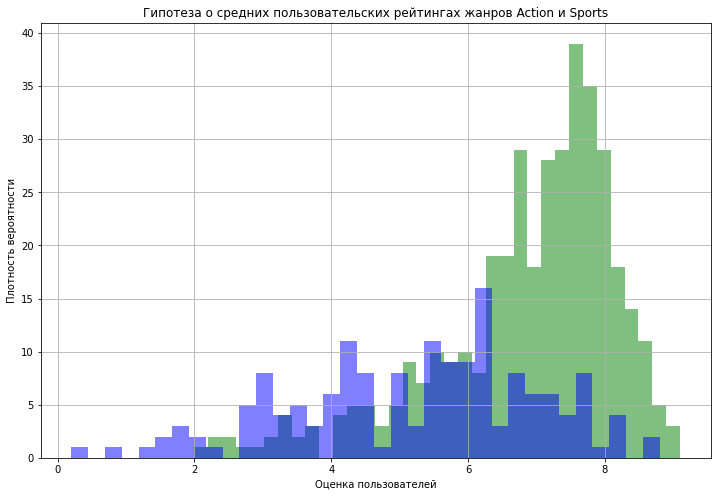

In [49]:
data_actual[(data_actual.genre == "Action") & (data_actual.user_score.notna())]['user_score'].hist(bins=35, alpha=0.5, figsize=(12, 8), color='green')
data_actual[(data_actual.genre == "Sports") & (data_actual.user_score.notna())]['user_score'].hist(bins=35, alpha=0.5, figsize=(12, 8), color='blue');
plt.xlabel('Оценка пользователей')
plt.ylabel('Плотность вероятности')
plt.title('Гипотеза о средних пользовательских рейтингах жанров Action и Sports')
plt.show()

<div style="border:solid green 2px; padding: 20px">
<b>Вывод</b>
    
Нулевая гипотеза – это основное проверяемое предположение, которое обычно формулируется как отсутствие различий, отсутствие влияние фактора, отсутствие эффекта, равенство нулю значений выборочных характеристик и т.п. Поэтому будем считать, что в нашем случае нулевая гипотеза - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза (H1) — в нашем исследовании будет утверждение, являющееся логическим отрицанием нулевой гипотезы - cредние пользовательские рейтинги платформ Xbox One и PC разные. Хотя получившееся p-value не столь велико, вероятность получить такие значения статистически мала. Оценки пользователей на этих платформах не отличаются.

Для того, чтобы принять решение о выдвинутых гипотезах, необходимо было сделать срез, т.к имелись пропуски, которые приводили бы значение p-value - nan, поэтому мы использовали st.ttest_ind.

Что касаемо средних пользовательских рейтингах жанров Action и Sports, Так как принятый критический уровень вероятности 5%, гипотезу следует отвергнуть как маловероятную. 

### Общий вывод

<div style="border:solid green 2px; padding: 20px">

Цель исследования — выявить определяющие успешность игры закономерности. Для этого обработаем и исследуем имеющиеся данные, составим портрет пользователя каждого региона ((NA, EU, JP)) и проверим гипотезы:средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. В дальнейшем это поможет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

Для начала была проанализирована исходная таблица в размере 16715 строк в 11 столбцах. В ходе предобработке были обнаружены пропуски в столбцах:year_of_release -269, critic_score-8578, user_score-6701, rating-6766. Проопуски в столбце года релиза, не смотря на их небольшое количество, удалять не стали. Также в этом столбце поменяли тип на целочисленное значение. Некоторые значения столбца user_score имеют строковые значения tbd.эта аббревиатура может быть использована и в случае с уже вышедшей игрой. Дело в том, что во многих случаях игра - это лишь база, основа для дальнейших дополнений. Поэтому в данной ситуации заменить на значение не определено, для того чтобы привести столбец к вещественному типу. В данной датафрейм сущетсвуют пропуски в столбцах оценки от критиков и пользователей. Считать среднее или медиану в таком случае не верно, т.к математическим путем получится, что у игры станет средняя оценка критиков 69, у пользователей 7, а на самом деле игра является не такой. Следовательно в данном случае целесообразно просто не трогать эти пропуски, т.к корректной замены они не имеют. В столбце Rating есть пропуски, их также нельзя заменить средним или медианной, так что учтем важность этих пропусков и просто заменим их на пропуски заменим на 'Unknown'.

В данном исследовании у нас нет подробных данных об объемах продаж каждой игры по годам - будем считать, что основные продажи приходятся на год выхода. В большинстве своем действительно шикарных игр выпускается очень малое количество, в основном они все схожи между собой, что-то новое все сложнее придумать, поэтому заметен резкий спад после 2012 года. Что касается платформ, то в среднем продолжительность жизни платформы состовляет 7.6 лет. К 2016 году PlayStation 4, WiiU, XBox One находятся на подъеме, Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, причем PlayStation Vita на протяжении всей жизни не пользовалась большой популярностью. Для прогнозирования будущих продаж следует пользоваться данными за последние несколько лет год. Современные технологии развиваются быстро, что способствует заданию новых трендов в игровой индустрии - что было популярно еще год назад не обязательно будет популярно в ближайшее время. Продажи игр сильнее коррелируют с оценкой критиков, чем с оценками пользователей. При этом оценки пользователкй зависят не от платформы, а от жанра.

Региональные отличия сильнее заметны в выборе пользователями игровых платформ, в долевом соотношение в Северной америке лидирует PlayStation 4 -28% и XBox One - 24%; в Европе это PlayStation 4 - 42% и PlayStation 3 - 20%; в Японии Nintendo 3DS-50%.
А вот выбор жанр схож в : Shooter, Platform, Sports. а у Японцев лидирует Role-Playing.
При составление портрета пльзователя таких регионов, как Северная Америка, Европа и Япония, то стоит опиратся на пользователей европейского и североамериканского региона: лучше всего будут продаваться игры жанра Shooter и Action на платформе Playstation 4. Все таки азиатская страна достаточно сильно отличается от нас. что касаемо возрастного рейтинга, то для Северной Америки и Европы больше всего продаются игры с рейтингом "для взрослых (старше 16 лет)".А в Японии наоборот, игры для взрослых имеют меньшую популярность, скорей всего их просто не пропускает цензура. Единогласно не взызскали признания игры в жанре Puzzle.

При проверке статистических гипотез удалость выяснить следующие факты:

- Средние пользовательские оценки платформ Xbox One и PC не различаются.
- Cредние пользовательские оценки жанров Action и Sports различаются. 

Оценки пользователей не зависят от платформ, но зависят от жанров игр. На основании принятого нами значения критического уровня статистической значимости 5% мы можем предполагать, что первая гипотеза верна, а вторая нет.

Рекомендации:
Для того чтобы спланировать рекламные компании, следует сделать ставку на игры предназанченые для PlayStation 4 и XBox One, в плане жанровой категории лучже выбрать Shooter, Sports и Role-Playing. 